# Pandas4 - Visualization

**[1] Pivot**<br>
**[2] Line chart**<br>
**[3] Bar chart**<br>
**[4] Area chart**<br>
**[5] Pie chart**<br>
**[6] Histogram**<br>
**[7] Scatter plot**<br>
**[8] Hexagon plot**<br>

In [2]:
import pandas as pd

## [1] Pivot

- **Example-1: Students' scores**

In [3]:
score_df = pd.DataFrame({"ID":["S01","S02","S03","S04","S05","S01","S02","S03","S04","S05"],
                        "Exam":["Exam-1","Exam-1","Exam-1","Exam-1","Exam-1","Exam-2","Exam-2","Exam-2","Exam-2","Exam-2"],
                        "Score":[95, 75, 70, 65, 85, 85, 70, 90, 55, 60]})
score_df

,ID,Exam,Score
0,S01,Exam-1,95
1,S02,Exam-1,75
2,S03,Exam-1,70
3,S04,Exam-1,65
4,S05,Exam-1,85
5,S01,Exam-2,85
6,S02,Exam-2,70
7,S03,Exam-2,90
8,S04,Exam-2,55
9,S05,Exam-2,60


In [4]:
score_df.pivot(index = "ID", columns = "Exam", values = "Score")

Exam,Exam-1,Exam-2
ID,,
S01,95,85
S02,75,70
S03,70,90
S04,65,55
S05,85,60


- **Example-2: Monthly sales**

In [5]:
sales_df = pd.DataFrame({ "Product":["A","A","A","A","A","A","B","B","B","B","B","B"],
                           "Quarter":["Q1","Q1","Q1","Q2","Q2","Q2","Q1","Q1","Q1","Q2","Q2","Q2"],
                           "Month":["Jan","Feb","Mar","Apr","May","Jun","Jan","Feb","Mar","Apr","May","Jun"],
                           "Sales":[67, 57, 87, 50, 97, 68, 78, 102, 113, 98, 80, 84]})
sales_df 

,Product,Quarter,Month,Sales
0,A,Q1,Jan,67
1,A,Q1,Feb,57
2,A,Q1,Mar,87
3,A,Q2,Apr,50
4,A,Q2,May,97
5,A,Q2,Jun,68
6,B,Q1,Jan,78
7,B,Q1,Feb,102
8,B,Q1,Mar,113
9,B,Q2,Apr,98


In [6]:
# Convert the dataframe to a wide-form format
sales_df_wide = sales_df.pivot(index = "Month", columns="Product", values = "Sales")
sales_df_wide

Product,A,B
Month,,
Apr,50,98
Feb,57,102
Jan,67,78
Jun,68,84
Mar,87,113
May,97,80


In [7]:
# Reindex
sales_df_wide = sales_df_wide.reindex(["Jan","Feb","Mar","Apr","May","Jun"])
sales_df_wide

Product,A,B
Month,,
Jan,67,78
Feb,57,102
Mar,87,113
Apr,50,98
May,97,80
Jun,68,84


## [2] Line chart

- **Series**

In [8]:
series_A = sales_df[sales_df.Product == "A"].Sales
series_A

0    67
1    57
2    87
3    50
4    97
5    68
Name: Sales, dtype: int64

<AxesSubplot:>

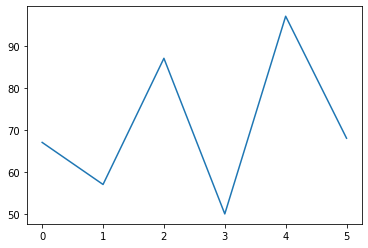

In [9]:
series_A.plot()

- **Series - use new index**

<AxesSubplot:>

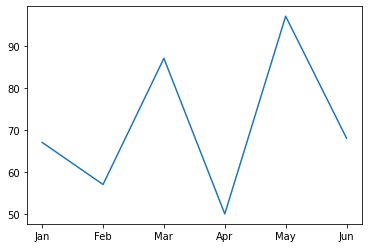

In [10]:
series_A.index = ["Jan","Feb","Mar","Apr","May","Jun"]
series_A.plot()

- **DataFrame - long form**

<AxesSubplot:xlabel='Month'>

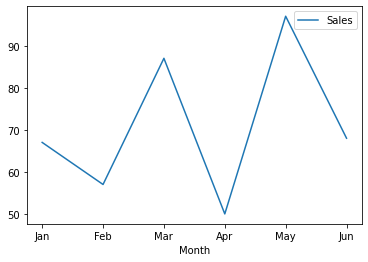

In [11]:
# Select the rows of product A
sales_df[sales_df.Product == "A"].plot(x = "Month", y = "Sales")

- **DataFrame - wide form**

<AxesSubplot:xlabel='Month'>

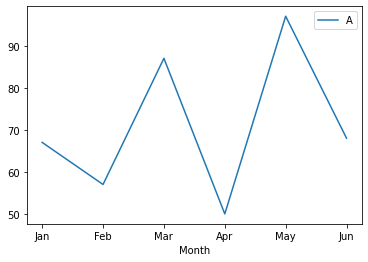

In [14]:
# Select the column of product A
sales_df_wide.plot(y = "A")

- **DataFrame - multiple lines**

<AxesSubplot:xlabel='Month'>

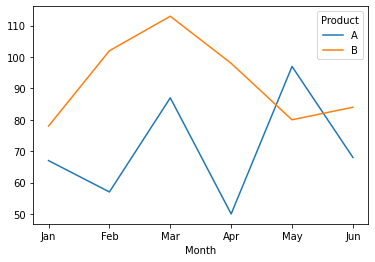

In [12]:
sales_df_wide.plot(y= ["A","B"])

- **DataFrame - custom style**

<AxesSubplot:xlabel='Month'>

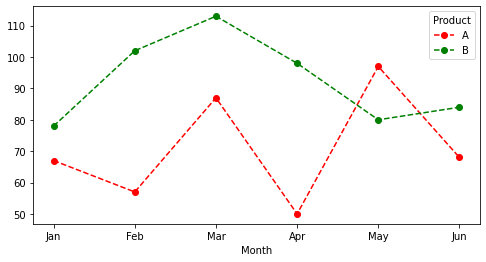

In [13]:
sales_df_wide.plot(y= ["A","B"], 
                   marker = "o", 
                   color = ["red","green"], 
                   linestyle = 'dashed',
                   figsize = (8,4))

## Exercise.A

**(A.1) Given the dataframe <code>expense_df</code>. Convert the data frame to the following format (wide-form) and store the result in a new variable named <code>expense_df_wide</code>.**

||grocery|transportation|
|:-:|:-:|:-:|
|**Jan**|3050|1050|
|**Feb**|2800|900|
|**Mar**|2750|1150|
|**Apr**|2300|1850|
|**May**|3150|1250|
|**Jun**|2900|950|

In [14]:
expense_df = pd.DataFrame({'month':['Jan','Feb','Mar','Apr','May','Jun', 'Jan','Feb','Mar','Apr','May','Jun'],
                            'expense':[3050, 2800, 2750, 2300, 3150, 2900,1050, 900, 1150, 1850, 1250, 950],
                            'category':['grocery', 'grocery', 'grocery', 'grocery', 'grocery', 'grocery', 'transportation','transportation','transportation','transportation','transportation','transportation']})
expense_df

,month,expense,category
0,Jan,3050,grocery
1,Feb,2800,grocery
2,Mar,2750,grocery
3,Apr,2300,grocery
4,May,3150,grocery
5,Jun,2900,grocery
6,Jan,1050,transportation
7,Feb,900,transportation
8,Mar,1150,transportation
9,Apr,1850,transportation


In [38]:
expense_df_wide = expense_df.pivot(index ="month", columns = "category", values = "expense")
expense_df_wide

category,grocery,transportation
month,,
Apr,2300,1850
Feb,2800,900
Jan,3050,1050
Jun,2900,950
Mar,2750,1150
May,3150,1250


**(A.2) Use reindex() to make the dataframe <code>expense_df_wide</code> conform to the new index: ['Jan','Feb','Mar','Apr','May','Jun'].**


In [42]:
expense_df_wide = expense_df_wide.reindex(['Jan','Feb','Mar','Apr','May','Jun'])

In [43]:
expense_df_wide

category,grocery,transportation
month,,
Jan,3050,1050
Feb,2800,900
Mar,2750,1150
Apr,2300,1850
May,3150,1250
Jun,2900,950


**(A.3) Use the dataframe <code>expense_df_wide</code> obtained in (A.2). Draw a multiple line chart to show the monthly groceries and transportation expenses.**

<AxesSubplot:xlabel='month'>

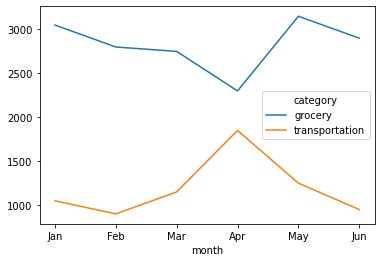

In [44]:
expense_df_wide.plot(y = ["grocery","transportation"])

**(A.4) Import dataset <code>fashion.csv</code> and set the first column as the index.**<br>
Hint: Use argument  <code>index_col=[0]</code>. 

In [47]:
fashion_df = pd.read_csv("../dataset/fashion.csv", index_col = [0])
fashion_df.head(5)

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden
Date,,,,,,,,,
2014-07-01,5744.000,29976.0,78835.127273,89833.846154,65226.40,63884.8,18971.813333,NaN,287420.5664
2014-08-01,7372.800,33969.0,98835.054545,153530.892308,43368.68,57153.6,48796.800000,NaN,322481.8272
2014-09-01,8881.000,28602.0,70640.000000,146138.461538,26553.20,47048.0,37864.266667,NaN,263211.0544
2014-10-01,10693.215,23257.0,70230.181818,151481.846154,37045.60,33032.0,23762.000000,NaN,295135.5360
2014-11-01,17121.800,29817.0,96073.745455,180756.000000,35666.80,25476.0,41173.600000,NaN,328531.0160


<AxesSubplot:xlabel='Date'>

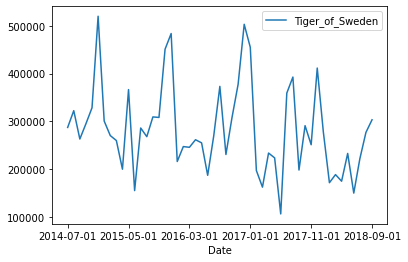

In [48]:
fashion_df.plot(y = "Tiger_of_Sweden")

**(A.5) Show the sales trends of <code>Eton</code>, <code>Levi_s</code>, and <code>Tiger_of_Sweden</code> with a multiple line chart.**<br>
Settings: Use marker = "D", figsize = (12,4). 

<AxesSubplot:xlabel='Date'>

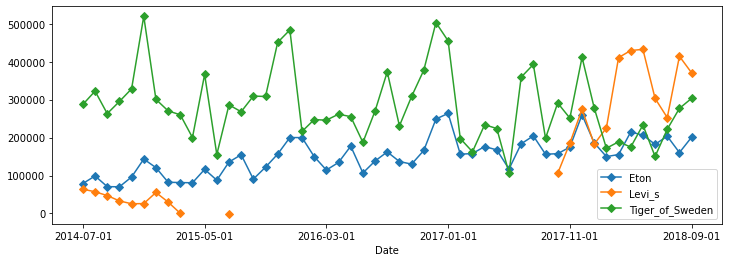

In [50]:
fashion_df.plot(y = ["Eton", "Levi_s", "Tiger_of_Sweden"], marker = "D", figsize = (12,4))

In [51]:
fashion_df.plot?

## [3] Bar chart

- **Series**

<AxesSubplot:>

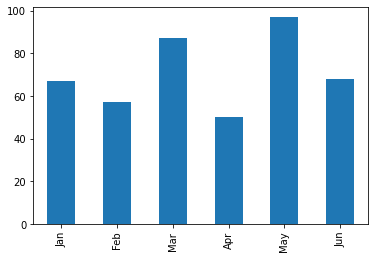

In [15]:
series_A.plot(kind = 'bar')

<AxesSubplot:>

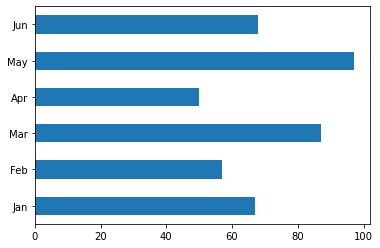

In [16]:
series_A.plot(kind = 'barh')

- **DataFrame - long form**

<AxesSubplot:xlabel='Month'>

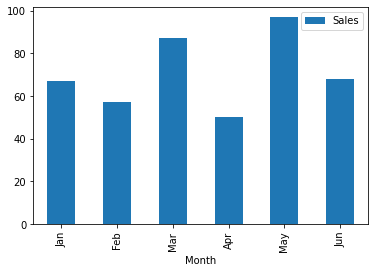

In [17]:
# long-form
sales_df[sales_df.Product == "A"].plot(kind = "bar", x = "Month", y = "Sales")

- **DataFrame - wide form**

<AxesSubplot:xlabel='Month'>

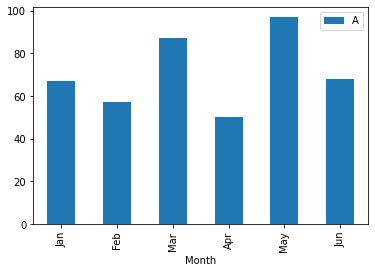

In [18]:
sales_df_wide.plot(kind = "bar", y = "A")

- **DataFrame - multiple bars**

<AxesSubplot:xlabel='Month'>

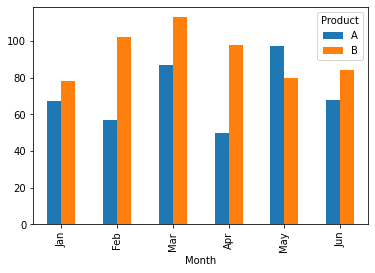

In [19]:
sales_df_wide.plot(kind = "bar", y= ["A","B"])

- **DataFrame - stacked bar chart**

<AxesSubplot:xlabel='Month'>

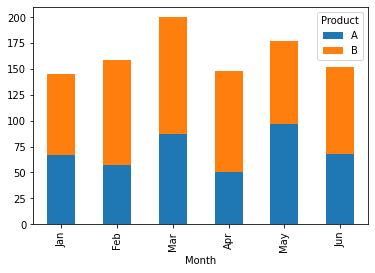

In [20]:
sales_df_wide.plot(kind = "bar", y= ["A","B"], stacked = True)

## [4] Area

- **Stacked area chart**

<AxesSubplot:xlabel='Month'>

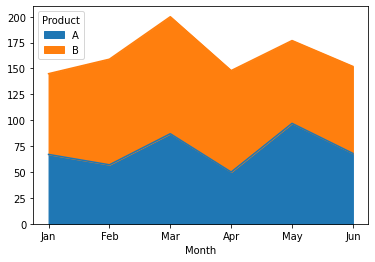

In [21]:
sales_df_wide.plot(kind = "area", y= ["A","B"]) #stacked = False

- **Unstacked area chart**

<AxesSubplot:xlabel='Month'>

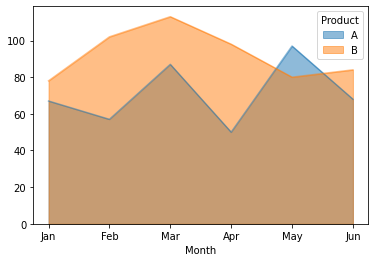

In [22]:
sales_df_wide.plot(kind = "area", y= ["A","B"], stacked = False)

## [5] Pie chart

In [23]:
sales_df.groupby("Product").sum()

,Sales
Product,
A,426
B,555


<AxesSubplot:ylabel='Sales'>

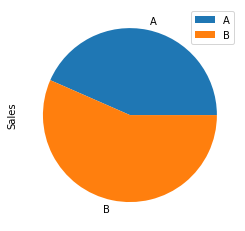

In [24]:
sales_df.groupby("Product").sum().plot(kind = "pie", y = "Sales")

## Exercise.B

**(B.1) Use the dataframe <code>expense_df_wide</code> obtained in (A.2). Draw a multiple bar chart to show the monthly groceries and transportation expenses.**

In [52]:
expense_df_wide

category,grocery,transportation
month,,
Jan,3050,1050
Feb,2800,900
Mar,2750,1150
Apr,2300,1850
May,3150,1250
Jun,2900,950


<AxesSubplot:xlabel='month'>

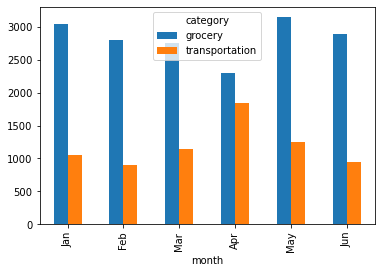

In [53]:
expense_df_wide.plot( kind= "bar", y = ["grocery", "transportation"])

**(B.2) Use the dataframe <code>expense_df_wide</code> obtained in (A.2). Draw a stacked area chart to show the monthly groceries and transportation expenses.**

<AxesSubplot:xlabel='month'>

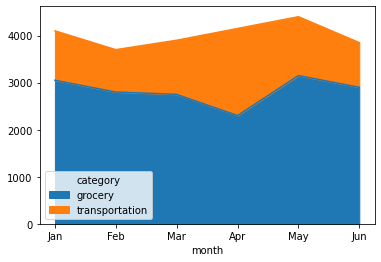

In [56]:
expense_df_wide.plot( kind= "area", y = ["grocery", "transportation"])

**(B.3) Import dataset <code>melbourne.csv</code>. Select the properties (rows) located in the following suburbs: Reservoir, Richmond, Bentleigh East, Preston.**<br>
Hint: DataFrame.Column.isin()

In [58]:
house_df = pd.read_csv("../dataset/melbourne.csv")

In [60]:
house_sub_df = house_df[house_df.Suburb.isin(["Reservoir", "Richmond", "Bentleigh East", "Preston"])]

In [62]:
house_df.shape

(13580, 21)

In [63]:
house_sub_df.shape

(1107, 21)

**(B.4) Group the data by the column <code>Suburb</code> and count the number of properties in each suburb.**<br>
Hint: size()

In [64]:
house_sub_df.groupby("Suburb").size()

Suburb
Bentleigh East    249
Preston           239
Reservoir         359
Richmond          260
dtype: int64

**(B.5) Display the results obtained in (B.2) with a pie chart.** 

<AxesSubplot:ylabel='None'>

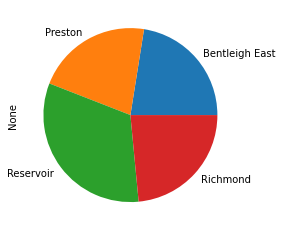

In [67]:
house_sub_df.groupby("Suburb").size().plot(kind = "pie")

## [6] Histogram

In [25]:
diabetes_df = pd.read_csv("../dataset/diabetes.csv", dtype = {"Outcome":object})
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# Select observations with pressure greater than 0 (remove outliers)
diabetes_df = diabetes_df[diabetes_df.BloodPressure>0]

- **Series**

<AxesSubplot:ylabel='Frequency'>

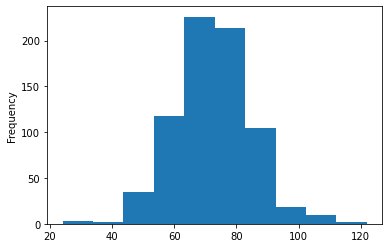

In [27]:
diabetes_df.BloodPressure.plot(kind = "hist")

In [28]:
print("min:", diabetes_df.BloodPressure.min())
print("max:", diabetes_df.BloodPressure.max())
print("bin width:", (diabetes_df.BloodPressure.max()-diabetes_df.BloodPressure.min())/10)

min: 24
max: 122
bin width: 9.8


- **Series - custom bins**

<AxesSubplot:ylabel='Frequency'>

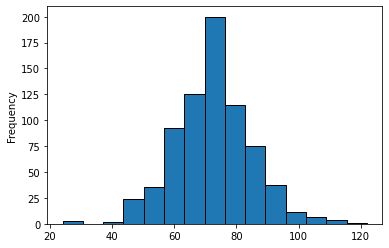

In [29]:
diabetes_df.BloodPressure.plot(kind = "hist", 
                               bins = 15, 
                               edgecolor = "black")

<AxesSubplot:ylabel='Frequency'>

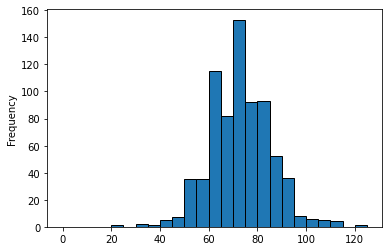

In [30]:
diabetes_df.BloodPressure.plot(kind = "hist", 
                               bins = range(0,130,5),
                               edgecolor = "black")

- **DataFrame**

<AxesSubplot:ylabel='Frequency'>

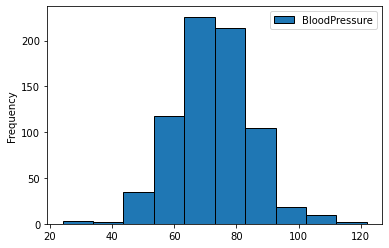

In [31]:
diabetes_df.plot(kind = "hist", y = "BloodPressure", edgecolor = "black")

## [7] Scatter plot

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

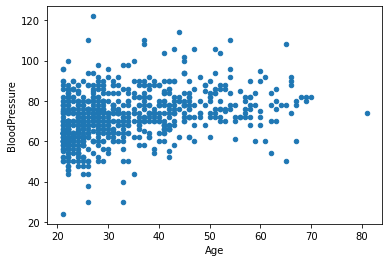

In [32]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure")

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

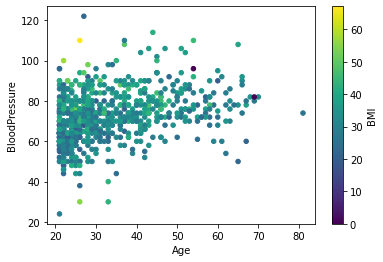

In [33]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure", c= "BMI", cmap = "viridis", sharex=False)

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

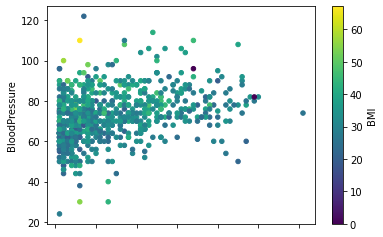

In [68]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure", c= "BMI", cmap = "viridis")

In [34]:
pd.__version__

'1.2.4'

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

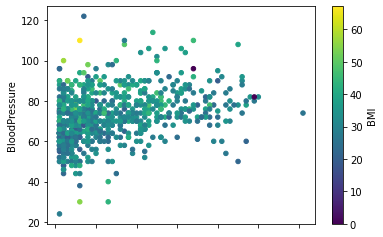

In [35]:
diabetes_df.plot(kind = "scatter", x ="Age", y= "BloodPressure", c= "BMI", cmap = "viridis")

## [8] Hexagon plot

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

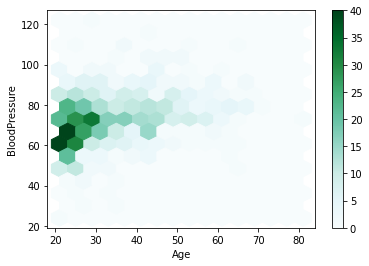

In [36]:
diabetes_df.plot(kind = "hexbin", x ="Age", y= "BloodPressure", gridsize = 15, sharex=False)

## Exercise.C

**(C.1) Import dataset <code>wine.csv</code> and set the first column as the index. Display the first 5 rows.** 

Description of each column
- **country**: The country that the wine is from
- **description**: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- **designation**: The vineyard within the winery where the grapes that made the wine are from
- **points**: The number of points WineEnthusiast rated the wine on a scale of 1-100
- **price**: The cost for a bottle of the wine
- **province**: The province or state that the wine is from
- **region_1**: The wine growing area in a province or state
- **region_2**: Sometimes there are more specific regions specified within a wine growing area, but this value can sometimes be blank
- **variety**: The type of grapes used to make the wine
- **winery**: The winery that made the wine

In [70]:
wine_df = pd.read_csv("../dataset/wine.csv", index_col = [0])
wine_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


**(C.2) Use the following criteria to select a subset. Use this subset for the following tasks.**<br>
- Select wines (rows) from Spain, Italy or France (use column <code>country</code>).
- Select wines (rows) with a price of less than 200(use column <code>price</code>).

In [73]:
wine_sub_df = wine_df[ (wine_df.country.isin(["Spain","Italy","France"])) & (wine_df.price < 200)   ]
wine_sub_df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


**(C.3) Use a histogram to show the cost distribution of French wines.**<br>
Hint: Use column <code>price</code>.

<AxesSubplot:ylabel='Frequency'>

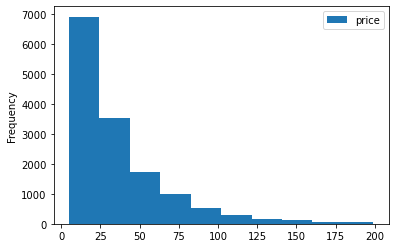

In [75]:
wine_sub_df[wine_sub_df.country == "France"].plot(kind = "hist", y = "price")

**(C.4) Use a scatter plot to show the relationship between wine cost and the number of points received in the review.**<br>
Hint: Use column <code>price</code> and <code>points</code>.

<AxesSubplot:xlabel='price', ylabel='points'>

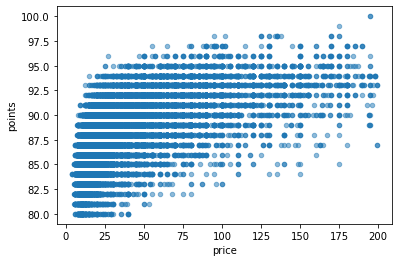

In [77]:
wine_sub_df.plot(kind = "scatter", x = "price", y = "points", alpha = 0.5)

**(C.5) Use a hexagon plot to show the relationship between wine cost and the number of points recieved in the review.**<br>
Hint: Use gridsize = 20</code>.

<AxesSubplot:xlabel='price', ylabel='points'>

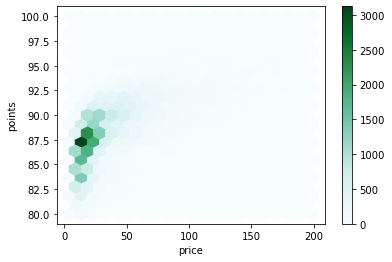

In [79]:
wine_sub_df.plot(kind = "hexbin", x = "price", y = "points", gridsize = 20, sharex = False)